<a href="https://colab.research.google.com/github/Chawwww/Practical-Discrete-Mathematics/blob/master/chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enlarge the image

transpose image 90 degree

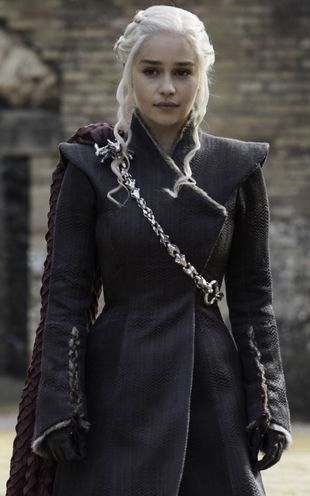

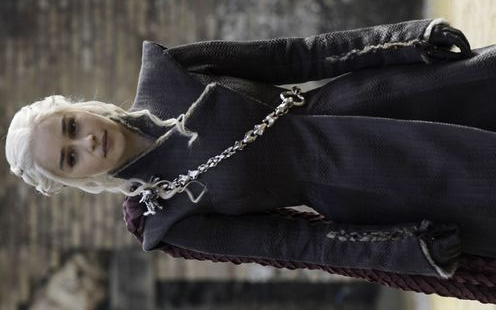

In [ ]:
from PIL import Image as PILImage
from IPython.display import Image, display
import requests
from io import BytesIO

# enlarge the image
# !pip install Pillow  # Already installed in previous code execution

image_url = "https://static.wikia.nocookie.net/protagonists/images/e/e3/Daenerys_Targaryen.jpg/revision/latest?cb=20180330232816"

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    image = PILImage.open(BytesIO(response.content))
    display(image)  # Display the original image

    transposed_image = image.transpose(PILImage.ROTATE_90)
    display(transposed_image)

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
except Exception as e:
    print(f"Error processing image: {e}")

change the image of the gray tone

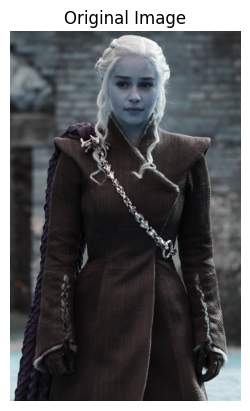

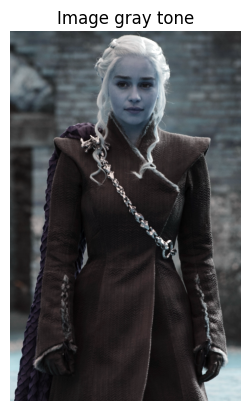

In [ ]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load an image
url = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'  # Wikipedia logo URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Remove the background
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
mask = cv2.bitwise_not(thresh)

# Create 3-channel alpha mask
alpha = cv2.merge([mask, mask, mask])

# Add alpha channel to the image
b, g, r = cv2.split(img)
rgba = [b, g, r, mask]
img_no_bg = cv2.merge(rgba, 4)

# Display the image without background
plt.imshow(cv2.cvtColor(img_no_bg, cv2.COLOR_BGRA2RGBA))
plt.title('Image gray tone')
plt.axis('off')
plt.show()

remove backgroud

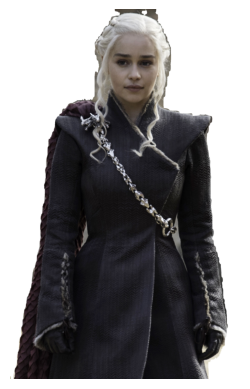

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Read the image
image = cv2.imread("input_image.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()

change the image of the gray tone

In [ ]:
from PIL import Image as PILImage
from IPython.display import Image, display
import requests
from io import BytesIO

# enlarge the image
# !pip install Pillow  # Already installed in previous code execution

image_url = "https://static.wikia.nocookie.net/protagonists/images/e/e3/Daenerys_Targaryen.jpg/revision/latest?cb=20180330232816"

def convert_to_grayscale(image_path, output_path):
    try:
        img = Image.open(image_path)
        gray_img = ImageOps.grayscale(img)
        gray_img.save(output_path)
        print(f"Grayscale image saved as {output_path}")
        display(gray_img)
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
convert_to_grayscale("enlarged_image.jpg", "grayscale_image.jpg")

An error occurred: type object 'Image' has no attribute 'open'


remove background

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 38.6 MB/s eta 0:00:00


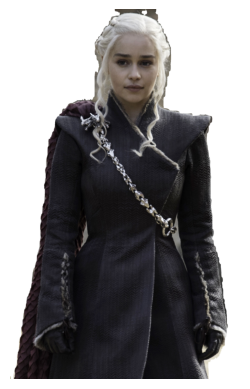

In [ ]:
!pip install mediapipe opencv-python-headless
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Read the image
image = cv2.imread("input_image.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()

combine two image

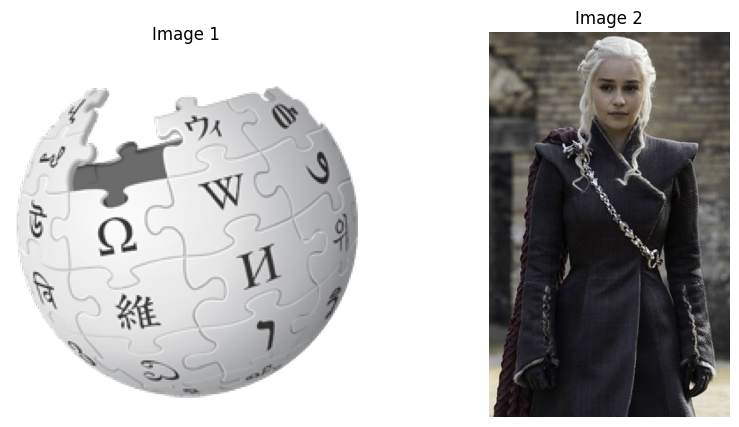

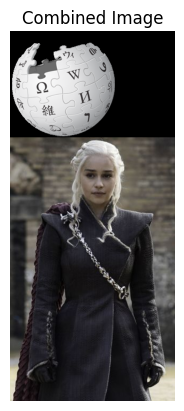

In [ ]:
!pip install pillow

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the images
url1 = 'https://upload.wikimedia.org/wikipedia/commons/6/63/Wikipedia-logo.png'
url2 = 'https://static.wikia.nocookie.net/protagonists/images/e/e3/Daenerys_Targaryen.jpg/revision/latest?cb=20180330232816'

response1 = requests.get(url1)
img1 = Image.open(BytesIO(response1.content))

response2 = requests.get(url2)
img2 = Image.open(BytesIO(response2.content))

# Display the original images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.show()

# Combine the images vertically
width = max(img1.width, img2.width)
total_height = img1.height + img2.height

combined_img = Image.new('RGB', (width, total_height))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

plt.imshow(combined_img)
plt.title('Combined Image')
plt.axis('off')
plt.show()